In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.special import boxcox1p

from IPython.display import displaynotebooks
from mplfinance.original_flavor import candlestick_ohlc

import os

import warnings
warnings.filterwarnings(action='ignore')


In [8]:
os.chdir(r'C:\Users\USER\Documents\dev\upstage-ml-regression-sigma7\data')

In [10]:
train_file = r'train.csv'
test_file = r'test.csv'
train = pd.read_csv(train_file, encoding= 'utf-8')
test = pd.read_csv(test_file, encoding= 'utf-8')
print('train 데이터입니다.')
train


train 데이터입니다.


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


In [11]:
test

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307,19,13,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9268,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307,25,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9269,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308,27,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9270,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309,2,18,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0


In [12]:
train['train_data'] = 1
test['train_data'] = 0

train  = pd.concat([train, test]).reset_index(drop=True)

In [13]:
target = pd.DataFrame(train.loc[train['train_data'] == 1, 'target'])

In [14]:
target

,target
0,124000.0
1,123500.0
2,91500.0
3,130000.0
4,117000.0
...,...
1118817,20000.0
1118818,20000.0
1118819,28000.0
1118820,29000.0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적(㎡)                 1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개

In [16]:
train['건축년도'].min(), train['건축년도'].max()

(1961, 2023)

In [17]:
train['계약년월'].min(), train['계약년월'].max()

(200701, 202309)

In [18]:
train['계약년월'] = pd.to_datetime(train['계약년월'], format='%Y%m' )

train['계약년'] = train['계약년월'].dt.year
train['계약월'] = train['계약년월'].dt.month

train

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,train_data,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,8,3,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1,2017,12
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,22,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1,2017,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,2017-12-01,28,5,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1,2017,12
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,3,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1,2018,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,8,2,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,2023-07-01,19,13,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,2023-07-01,25,12,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,2023-08-01,27,12,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,8
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,2023-09-01,2,18,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,9


In [19]:
train_origin = train.copy()

In [20]:
display(f'데이터셋 컬럼: {tuple(train_origin)}')

"데이터셋 컬럼: ('시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'train_data', '계약년', '계약월')"

In [21]:
train_origin.drop('target', axis=1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,train_data,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,1,2017,12
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,1,2017,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,2017-12-01,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,1,2017,12
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,1,2018,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,2023-07-01,19,13,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,0,2023,7
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,2023-07-01,25,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,0,2023,7
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,2023-08-01,27,12,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,0,2023,8
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,2023-09-01,2,18,2014,...,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,0,2023,9


In [22]:
train_origin.isnull().sum()

시군구                             0
번지                            227
본번                             75
부번                             75
아파트명                         2136
전용면적(㎡)                         0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1121899
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         877273
k-전화번호                     876850
k-팩스번호                     879348
단지소개기존clob                1058958
k-세대타입(분양형태)               876125
k-관리방식                     876125
k-복도유형                     876454
k-난방방식                     876125
k-전체동수                     877207
k-전체세대수                    876125
k-건설사(시공사)                 877637
k-시행사                      877834
k-사용검사일-사용승인일              876259
k-연면적                      876125
k-주거전용면적      

In [23]:
print(f"결측치 100만 이상: {list(train_origin.columns[train_origin.isnull().sum() >= 1000000])}")
print(f"결측치 100만 이하: {list(train_origin.columns[train_origin.isnull().sum() <= 1000000])}")

결측치 100만 이상: ['해제사유발생일', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자']
결측치 100만 이하: ['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'train_data', '계약년', '계약월']


In [24]:
selected = list(train_origin.columns[train_origin.isnull().sum() <= 1000000])
train_selected = train_origin[selected]

In [25]:
train_selected

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,train_data,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,8,3,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1,2017,12
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,22,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1,2017,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,2017-12-01,28,5,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1,2017,12
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,3,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1,2018,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,8,2,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,2023-07-01,19,13,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,2023-07-01,25,12,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,2023-08-01,27,12,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,8
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,2023-09-01,2,18,2014,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,9


In [26]:
train_selected.isnull().sum()

시군구                            0
번지                           227
본번                            75
부번                            75
아파트명                        2136
전용면적(㎡)                        0
계약년월                           0
계약일                            0
층                              0
건축년도                           0
도로명                            0
등기신청일자                         0
거래유형                           0
중개사소재지                         0
k-단지분류(아파트,주상복합등등)        877273
k-전화번호                    876850
k-팩스번호                    879348
k-세대타입(분양형태)              876125
k-관리방식                    876125
k-복도유형                    876454
k-난방방식                    876125
k-전체동수                    877207
k-전체세대수                   876125
k-건설사(시공사)                877637
k-시행사                     877834
k-사용검사일-사용승인일             876259
k-연면적                     876125
k-주거전용면적                  876170
k-관리비부과면적                 876125
k-전용면적별세대현황(60㎡이하)        876170
k-전용면적별세대현

In [27]:
train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 50 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   시군구                     1128094 non-null  object        
 1   번지                      1127867 non-null  object        
 2   본번                      1128019 non-null  float64       
 3   부번                      1128019 non-null  float64       
 4   아파트명                    1125958 non-null  object        
 5   전용면적(㎡)                 1128094 non-null  float64       
 6   계약년월                    1128094 non-null  datetime64[ns]
 7   계약일                     1128094 non-null  int64         
 8   층                       1128094 non-null  int64         
 9   건축년도                    1128094 non-null  int64         
 10  도로명                     1128094 non-null  object        
 11  등기신청일자                  1128094 non-null  object        
 12  거래유형          

In [28]:
train_origin['본번'] = train_origin['본번'].astype('str')
train_origin['부번'] = train_origin['부번'].astype('str')

In [29]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in train_origin.columns:
    if pd.api.types.is_numeric_dtype(train_origin[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월']
범주형 변수: ['시군구', '번지', '본번', '부번', '아파트명', '계약년월', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


In [30]:
def feature_validity_check(df, target_col):
    result = []

    for col in df.columns:
        if col == target_col:
            continue
        
        # 결측 비율
        missing_ratio = df[col].isnull().mean()
        
        # 유일값 개수
        nunique = df[col].nunique()
        
        # dtype에 따라 target과 관계 확인
        if pd.api.types.is_numeric_dtype(df[col]):
            # 수치형 → 상관계수
            corr = df[[col, target_col]].corr().iloc[0,1]
        else:
            # 범주형 → target 평균의 분산 (카테고리별로 가격 차이가 큰지)
            try:
                group_var = df.groupby(col)[target_col].mean().var()
                corr = group_var
            except:
                corr = np.nan
        
        result.append({
            "컬럼명": col,
            "결측률": round(missing_ratio, 3),
            "유일값 개수": nunique,
            "target과의 관련도": round(corr, 3) if pd.notnull(corr) else None
        })

    return pd.DataFrame(result).sort_values(by="결측률", ascending=False)


# 실행 예시
validity_df = feature_validity_check(train_selected[train_selected['train_data']==1], target_col="target")
print(validity_df.head(20))

                       컬럼명    결측률  유일값 개수  target과의 관련도
33                고용보험관리번호  0.816     526  1.865499e+09
35                세대전기계약방법  0.785       2  4.283905e+08
16                  k-팩스번호  0.780    1364  3.991812e+09
24                   k-시행사  0.779     555  2.693365e+09
36                 청소비관리형태  0.779       4  2.735932e+08
23              k-건설사(시공사)  0.779     344  1.489864e+09
14      k-단지분류(아파트,주상복합등등)  0.778       5  1.242347e+09
21                  k-전체동수  0.778      41  2.340000e-01
19                  k-복도유형  0.778       5  5.618039e+08
15                  k-전화번호  0.778    1081  2.376330e+09
34                 경비비관리형태  0.778       4  7.520983e+07
40                   단지승인일  0.778     735  2.534505e+09
39     기타/의무/임대/임의=1/2/3/4  0.777       4  3.337914e+08
38                    주차대수  0.777     526  3.480000e-01
32                  k-수정일자  0.777     743  2.537959e+09
31            k-85㎡~135㎡이하  0.777     244  2.570000e-01
30  k-전용면적별세대현황(60㎡~85㎡이하)  0.777     387  2.300

In [31]:
drop_columns = ['고용보험관리번호', 'k-팩스번호','k-전화번호','k-수정일자','단지승인일','k-시행사','k-건설사(시공사)']

train_selected.drop(drop_columns, axis=1, inplace=True)

In [32]:
train_selected

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,train_data,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,8,3,1987,...,임의,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1,2017,12
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2017-12-01,22,4,1987,...,임의,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1,2017,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,2017-12-01,28,5,1987,...,임의,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1,2017,12
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,3,4,1987,...,임의,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1,2018,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,2018-01-01,8,2,1987,...,임의,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,2023-07-01,19,13,2014,...,의무,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,2023-07-01,25,12,2014,...,의무,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,2023-08-01,27,12,2014,...,의무,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,8
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,2023-09-01,2,18,2014,...,의무,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,9


In [33]:
train_selected['전용면적'] = train_selected['전용면적(㎡)']
train_selected.drop('전용면적(㎡)', axis=1,inplace=True)

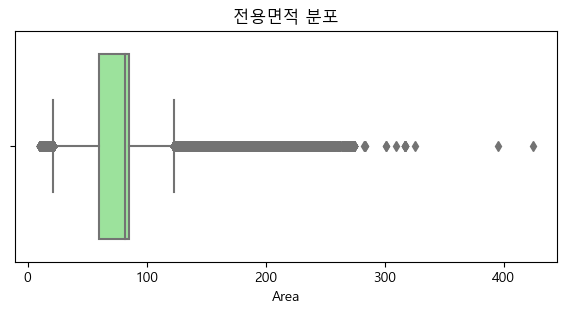

In [34]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = train_selected, x = '전용면적', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

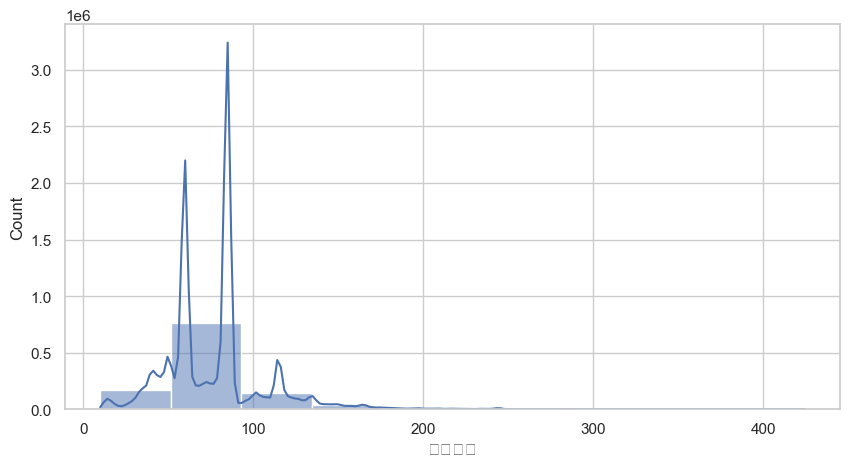

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(train_selected["전용면적"], bins=10, kde=True)
plt.show()

In [36]:
train_selected['k-135㎡초과'] = train['k-135㎡초과']

In [37]:
print(train_selected.columns.tolist())

['시군구', '번지', '본번', '부번', '아파트명', '계약년월', '계약일', '층', '건축년도', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'train_data', '계약년', '계약월', '전용면적', 'k-135㎡초과']


In [38]:
total = (
train_selected['k-전용면적별세대현황(60㎡이하)'].fillna(0) +
train_selected['k-전용면적별세대현황(60㎡~85㎡이하)'].fillna(0) +
train_selected['k-85㎡~135㎡이하'].fillna(0) +
train_selected['k-135㎡초과'].fillna(0)
)

In [39]:


train_selected['소형비율'] = train_selected['k-전용면적별세대현황(60㎡이하)'] / total
train_selected['중소형비율'] = train_selected['k-전용면적별세대현황(60㎡~85㎡이하)'] / total
train_selected['중대형비율'] = train_selected['k-85㎡~135㎡이하'] / total
train_selected['대형비율'] = train_selected['k-135㎡초과'] / total

In [40]:
train_selected.drop(['k-전용면적별세대현황(60㎡이하)','k-전용면적별세대현황(60㎡~85㎡이하)','k-85㎡~135㎡이하','k-135㎡초과'], axis=1, inplace=True)

In [41]:
train_selected.head(1)

,시군구,번지,본번,부번,아파트명,계약년월,계약일,층,건축년도,도로명,...,단지신청일,target,train_data,계약년,계약월,전용면적,소형비율,중소형비율,중대형비율,대형비율
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2017-12-01,8,3,1987,언주로 3,...,2022-11-17 10:19:06.0,124000.0,1,2017,12,79.97,0.074074,0.925926,0.0,NaN


In [42]:
train_selected[['소형비율','중소형비율','중대형비율','대형비율']] = \
    train_selected[['소형비율','중소형비율','중대형비율','대형비율']].fillna(0)

In [43]:
train_selected['비율정보_결측'] = train_selected[['소형비율','중소형비율','중대형비율','대형비율']].isna().any(axis=1).astype(int)


In [44]:
train_selected.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '계약년월', '계약일', '층', '건축년도', '도로명',
       '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '좌표X',
       '좌표Y', '단지신청일', 'target', 'train_data', '계약년', '계약월', '전용면적', '소형비율',
       '중소형비율', '중대형비율', '대형비율', '비율정보_결측'],
      dtype='object')

In [45]:
import matplotlib
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [46]:
continuous_columns = []
categorical_columns = []

for column in train_selected.columns:
    if pd.api.types.is_numeric_dtype(train_selected[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월', '전용면적', '소형비율', '중소형비율', '중대형비율', '대형비율', '비율정보_결측']
범주형 변수: ['시군구', '번지', '아파트명', '계약년월', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '단지신청일']


In [47]:
train_selected

,시군구,번지,본번,부번,아파트명,계약년월,계약일,층,건축년도,도로명,...,target,train_data,계약년,계약월,전용면적,소형비율,중소형비율,중대형비율,대형비율,비율정보_결측
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2017-12-01,8,3,1987,언주로 3,...,124000.0,1,2017,12,79.97,0.074074,0.925926,0.000000,0.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2017-12-01,22,4,1987,언주로 3,...,123500.0,1,2017,12,79.97,0.074074,0.925926,0.000000,0.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2017-12-01,28,5,1987,언주로 3,...,91500.0,1,2017,12,54.98,0.074074,0.925926,0.000000,0.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2018-01-01,3,4,1987,언주로 3,...,130000.0,1,2018,1,79.97,0.074074,0.925926,0.000000,0.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,2018-01-01,8,2,1987,언주로 3,...,117000.0,1,2018,1,79.97,0.074074,0.925926,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,2023-07-01,19,13,2014,신내역로1길 85,...,NaN,0,2023,7,84.65,0.576320,0.359486,0.064194,0.0,0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,2023-07-01,25,12,2014,신내역로1길 85,...,NaN,0,2023,7,84.62,0.576320,0.359486,0.064194,0.0,0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,2023-08-01,27,12,2014,신내역로1길 85,...,NaN,0,2023,8,101.65,0.576320,0.359486,0.064194,0.0,0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,2023-09-01,2,18,2014,신내역로1길 85,...,NaN,0,2023,9,84.94,0.576320,0.359486,0.064194,0.0,0


In [48]:
import platform
print(platform.system())

Windows


In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일 직접 지정
font_path = r"C:\Windows\Fonts\malgun.ttf"  # 맑은 고딕
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

print("현재 설정된 폰트:", plt.rcParams['font.family'])

현재 설정된 폰트: ['Malgun Gothic']


In [50]:
train_selected['k-연면적'].value_counts()

935380.0    3068
240629.0    2816
667132.0    2605
504698.0    2592
172371.0    2480
            ... 
80835.0        2
44951.0        2
51129.0        2
33807.0        1
60621.0        1
Name: k-연면적, Length: 735, dtype: int64

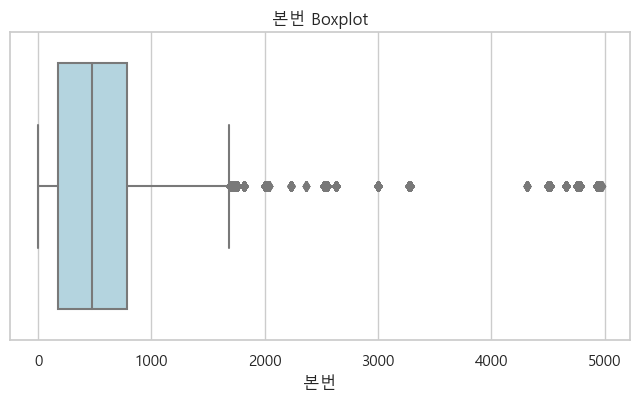

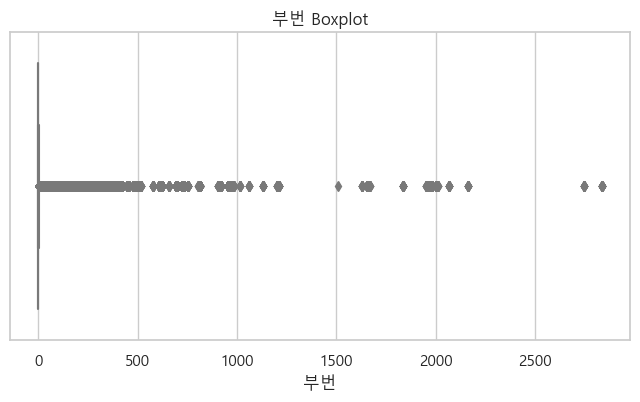

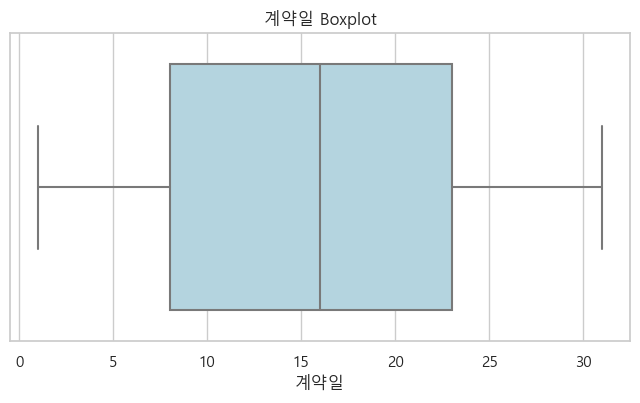

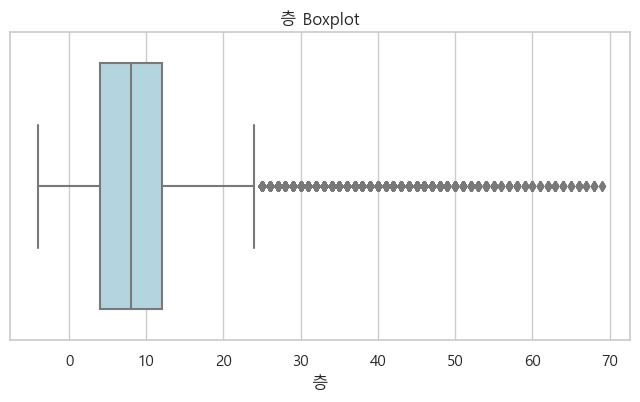

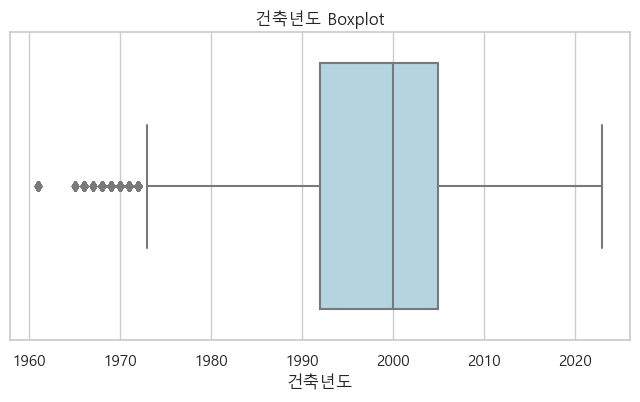

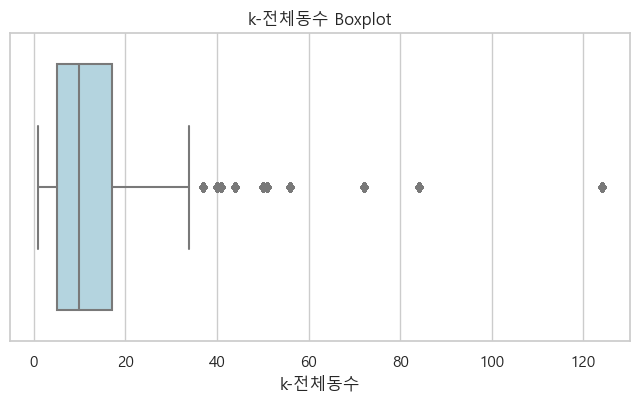

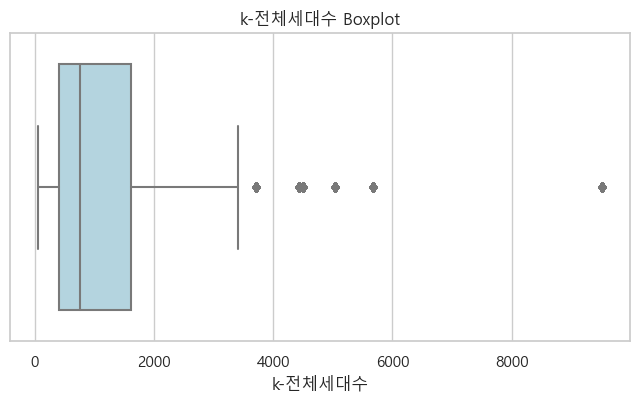

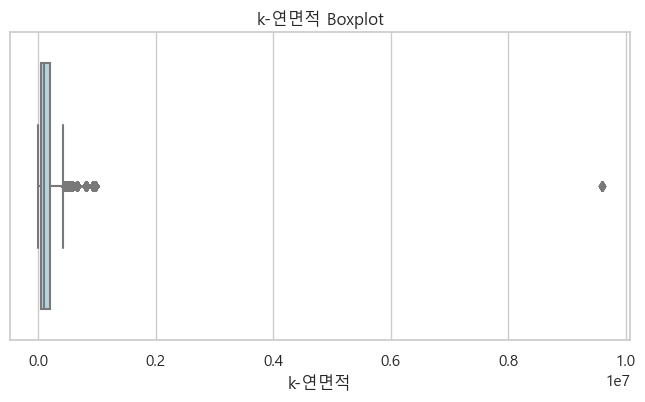

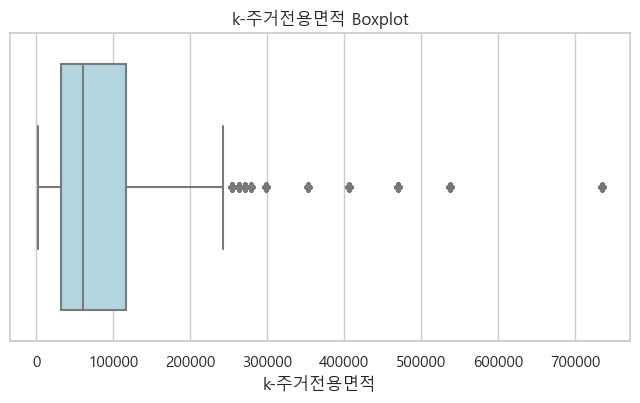

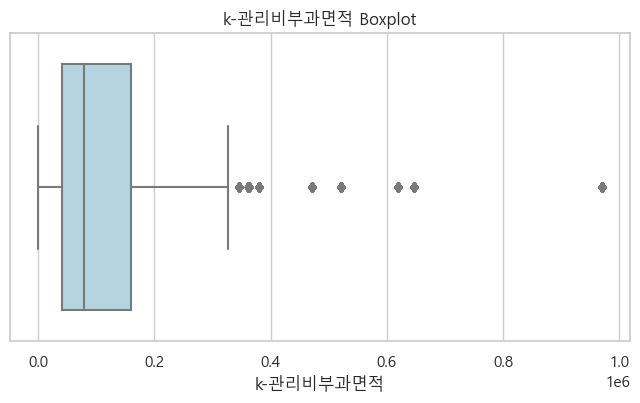

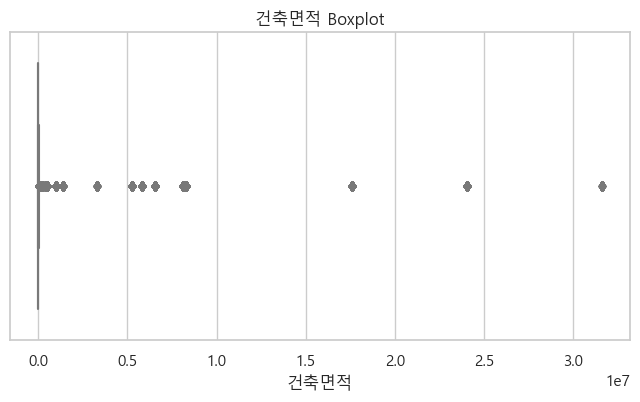

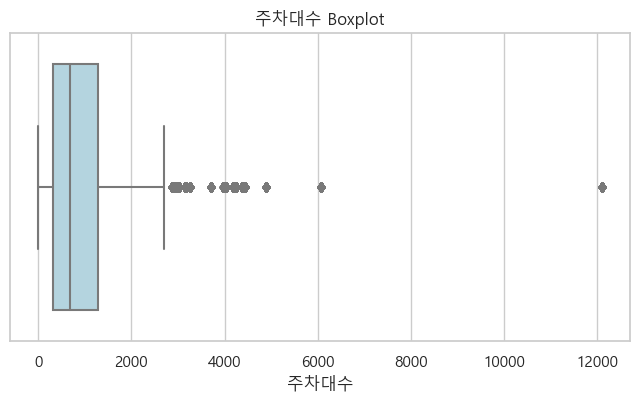

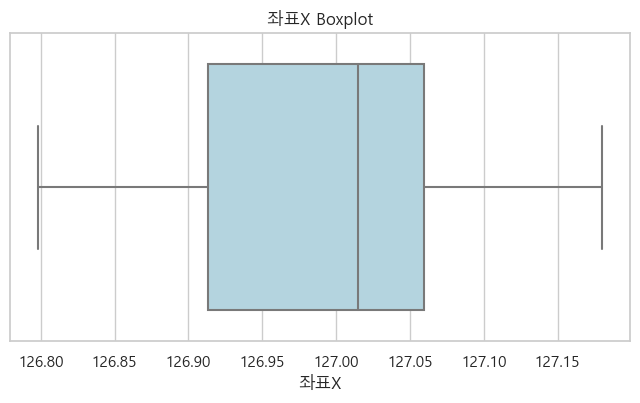

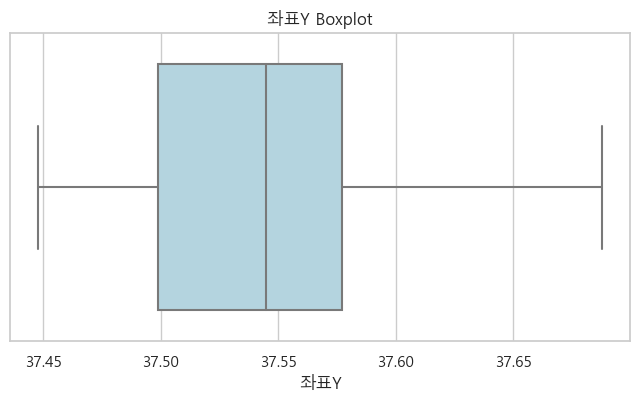

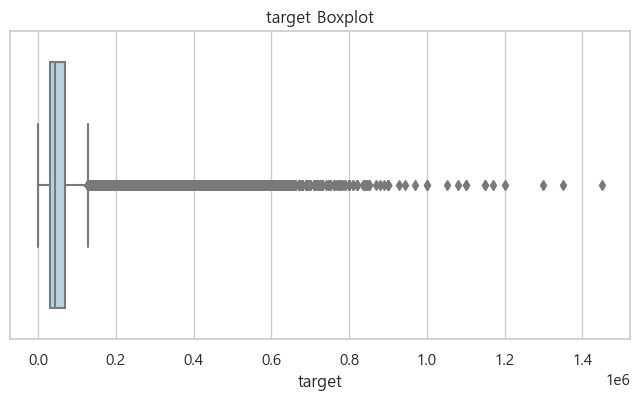

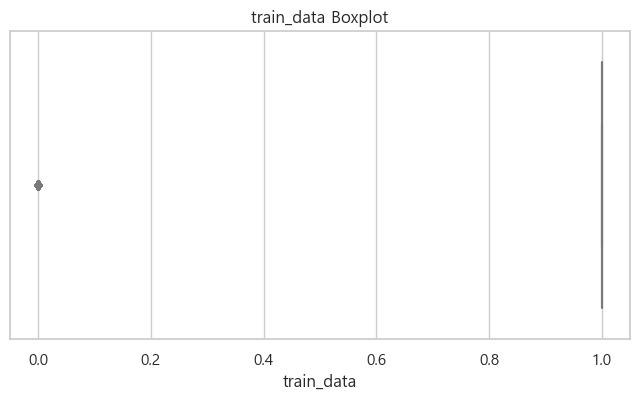

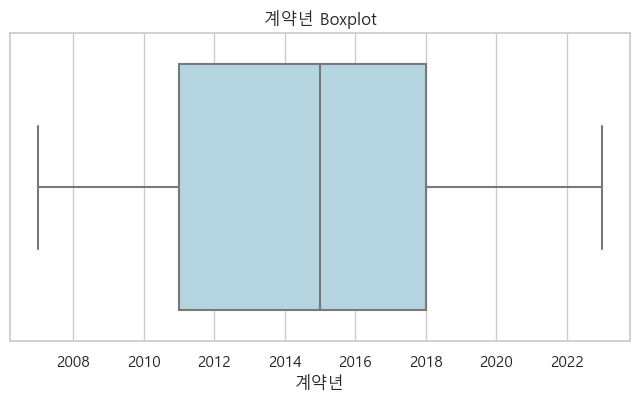

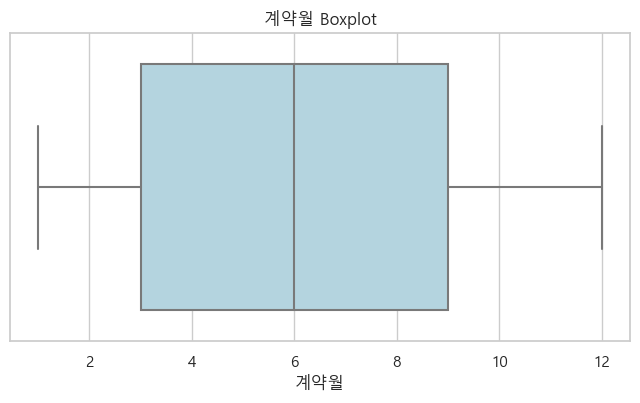

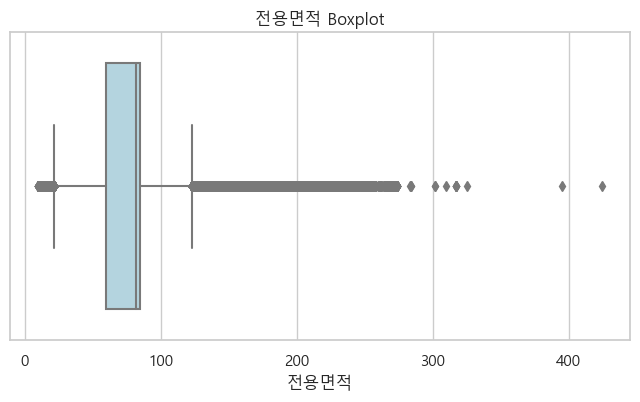

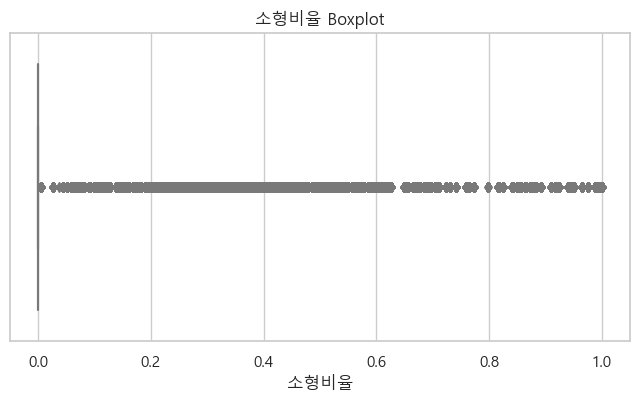

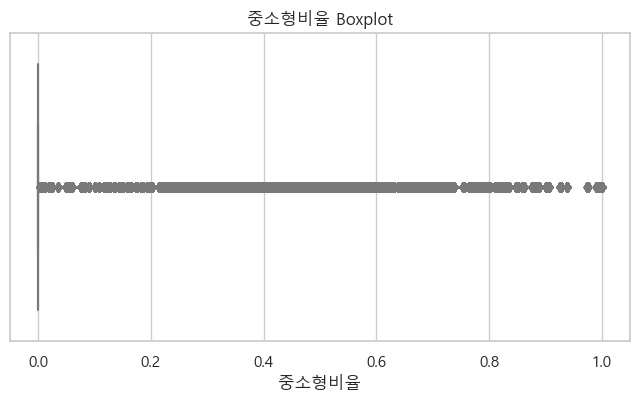

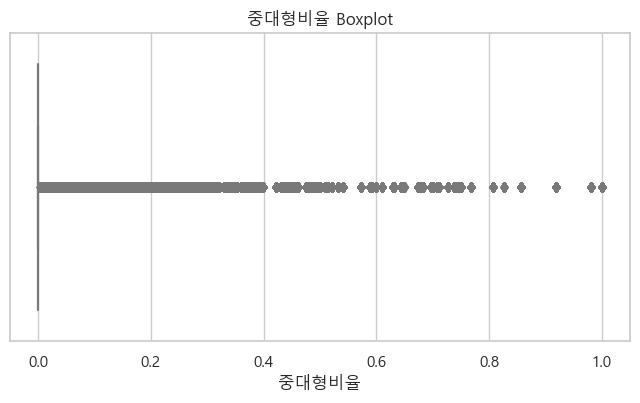

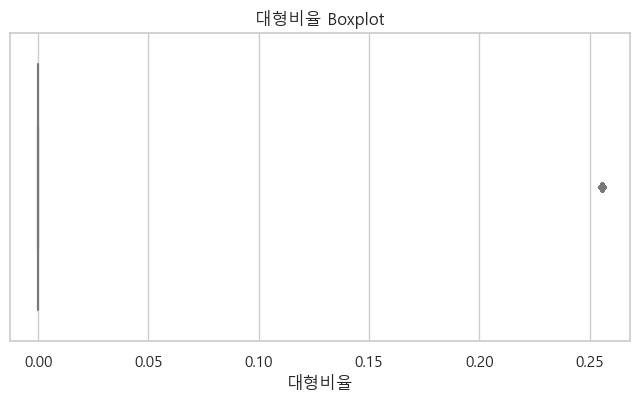

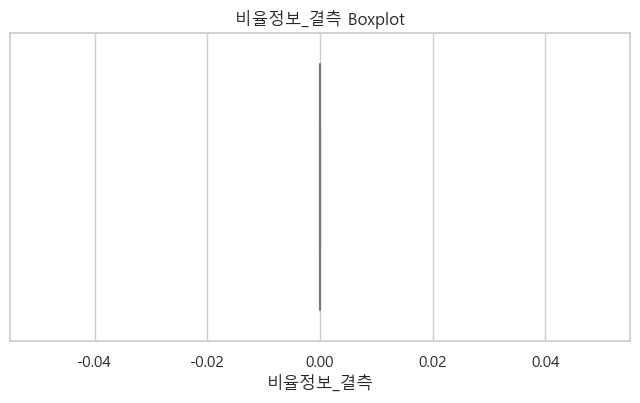

In [51]:
for col in continuous_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=train_selected, x=col, color="lightblue")
    plt.title(f"{col} Boxplot")
    plt.show()

In [52]:
train_selected.isnull().sum()

시군구                         0
번지                        227
본번                         75
부번                         75
아파트명                     2136
계약년월                        0
계약일                         0
층                           0
건축년도                        0
도로명                         0
등기신청일자                      0
거래유형                        0
중개사소재지                      0
k-단지분류(아파트,주상복합등등)     877273
k-세대타입(분양형태)           876125
k-관리방식                 876125
k-복도유형                 876454
k-난방방식                 876125
k-전체동수                 877207
k-전체세대수                876125
k-사용검사일-사용승인일          876259
k-연면적                  876125
k-주거전용면적               876170
k-관리비부과면적              876125
경비비관리형태                877561
세대전기계약방법               885389
청소비관리형태                877751
건축면적                   876279
주차대수                   876277
기타/의무/임대/임의=1/2/3/4    876125
사용허가여부                 876125
관리비 업로드                876125
좌표X                    876232
좌표Y       

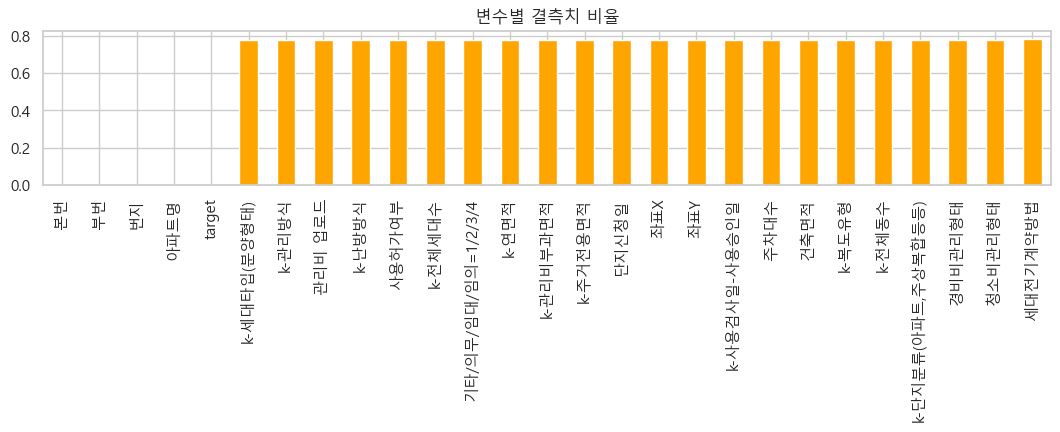

In [53]:
fig = plt.figure(figsize=(13, 2))
missing = train_selected.isnull().sum() / train_selected.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()


In [54]:
categorical_columns

['시군구',
 '번지',
 '아파트명',
 '계약년월',
 '도로명',
 '등기신청일자',
 '거래유형',
 '중개사소재지',
 'k-단지분류(아파트,주상복합등등)',
 'k-세대타입(분양형태)',
 'k-관리방식',
 'k-복도유형',
 'k-난방방식',
 'k-사용검사일-사용승인일',
 '경비비관리형태',
 '세대전기계약방법',
 '청소비관리형태',
 '기타/의무/임대/임의=1/2/3/4',
 '사용허가여부',
 '관리비 업로드',
 '단지신청일']

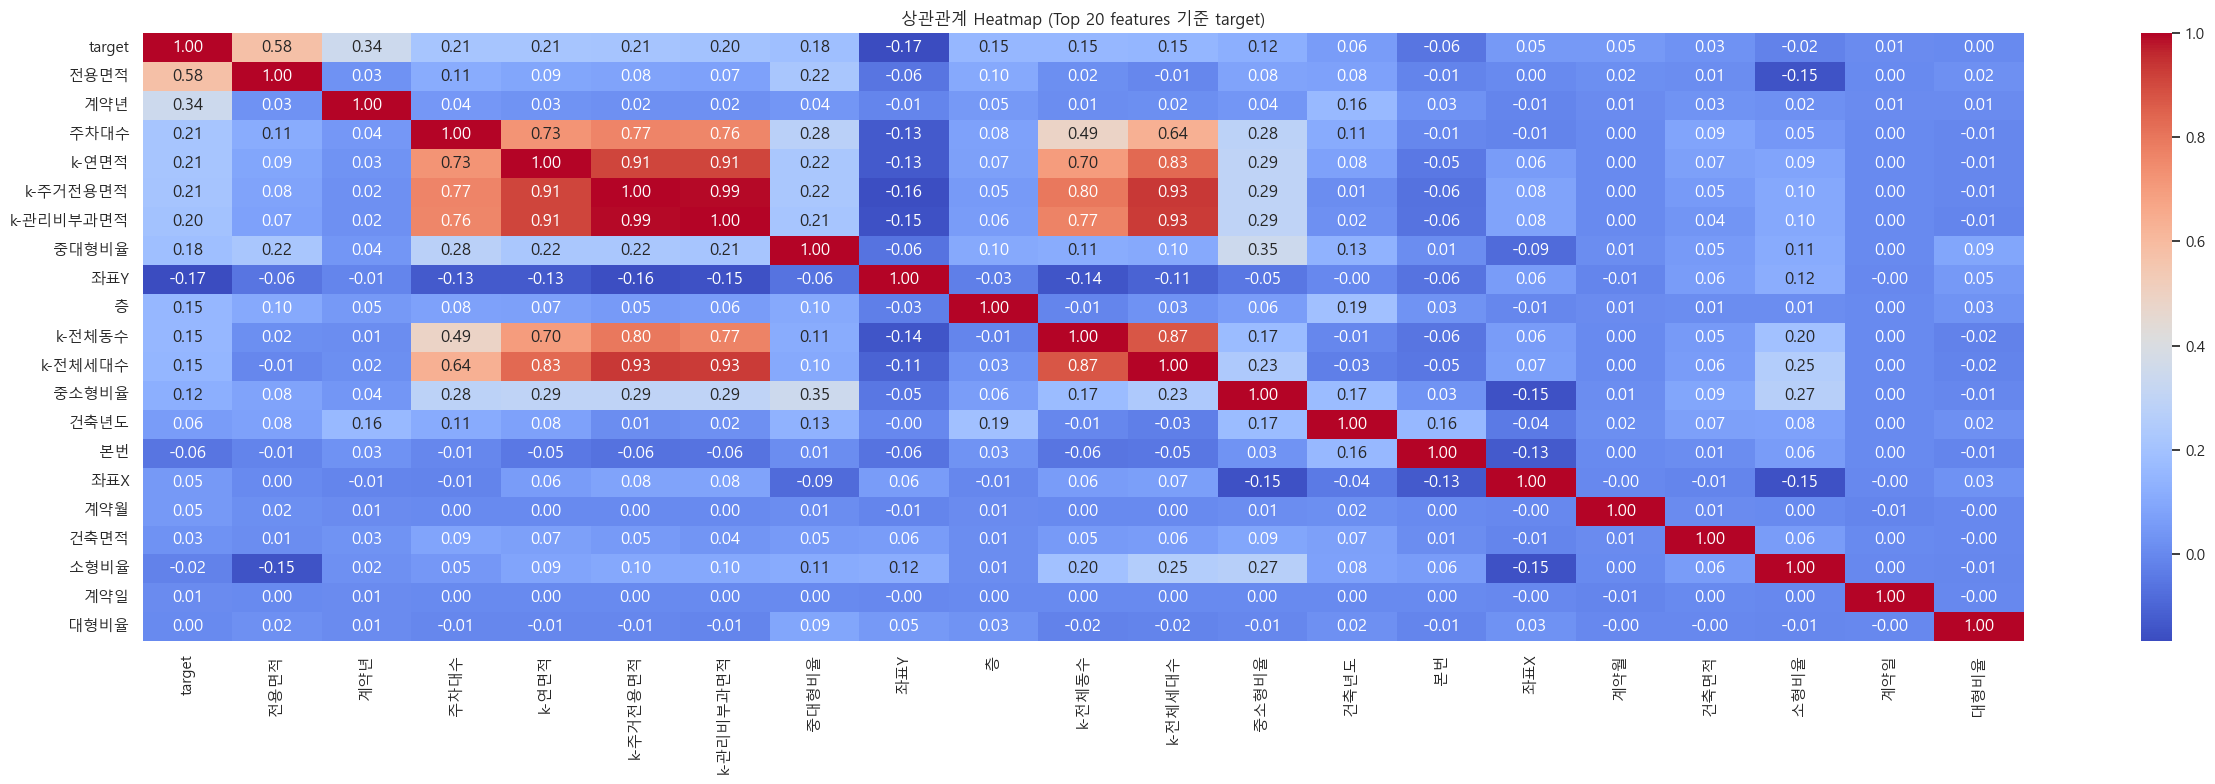

In [55]:
def plot_corr_heatmap(df, target_col="target", train_flag_col="train_data", topn=20):
    """
    - train 데이터만 사용
    - 수치형 변수의 target과 상관관계 계산
    - 상위 N개 변수 + target으로 heatmap 시각화
    """
    # train만 필터링
    dtrain = df[df[train_flag_col] == 1].copy()
    
    # 수치형 변수만 선택
    num_cols = dtrain.select_dtypes(include=["number"]).columns.tolist()
    if target_col in num_cols:
        pass
    else:
        num_cols.append(target_col)

    # 결측치 중앙값 대체 (상관 안정화)
    dnum = dtrain[num_cols].copy()
    dnum = dnum.fillna(dnum.median())

    # 상관계수 행렬
    corr = dnum.corr()

    # target과 상관 높은 상위 N 변수 선택
    target_corr = corr[target_col].abs().sort_values(ascending=False)
    top_features = target_corr.head(topn+1).index.tolist()  # target 포함

    # Heatmap 그리기
    plt.figure(figsize=(1.2*len(top_features), 8))
    sns.heatmap(corr.loc[top_features, top_features], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"상관관계 Heatmap (Top {topn} features 기준 {target_col})")
    plt.tight_layout()
    plt.show()

# ======================
# 사용 예시
# ======================
plot_corr_heatmap(train_selected, target_col="target", train_flag_col="train_data", topn=20)

In [56]:
train_selected[['k-전체동수', 'k-전체세대수','좌표X','좌표Y']].isnull().sum()

k-전체동수     877207
k-전체세대수    876125
좌표X        876232
좌표Y        876232
dtype: int64

In [57]:
train_selected1 = train_selected.copy()

In [58]:
drop_columns = ['번지','본번','부번','k-주거전용면적','계약일','비율정보_결측','거래유형','도로명','등기신청일자','단지신청일','관리비 업로드','중개사소재지','경비비관리형태','세대전기계약방법','청소비관리형태']

train_selected1.drop(drop_columns,axis=1, inplace=True)

In [59]:
train_selected1.isnull().sum()

시군구                         0
아파트명                     2136
계약년월                        0
층                           0
건축년도                        0
k-단지분류(아파트,주상복합등등)     877273
k-세대타입(분양형태)           876125
k-관리방식                 876125
k-복도유형                 876454
k-난방방식                 876125
k-전체동수                 877207
k-전체세대수                876125
k-사용검사일-사용승인일          876259
k-연면적                  876125
k-관리비부과면적              876125
건축면적                   876279
주차대수                   876277
기타/의무/임대/임의=1/2/3/4    876125
사용허가여부                 876125
좌표X                    876232
좌표Y                    876232
target                   9272
train_data                  0
계약년                         0
계약월                         0
전용면적                        0
소형비율                        0
중소형비율                       0
중대형비율                       0
대형비율                        0
dtype: int64

In [60]:
continuous_columns = []
categorical_columns = []

for column in train_selected1.columns:
    if pd.api.types.is_numeric_dtype(train_selected1[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-관리비부과면적', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월', '전용면적', '소형비율', '중소형비율', '중대형비율', '대형비율']
범주형 변수: ['시군구', '아파트명', '계약년월', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', '기타/의무/임대/임의=1/2/3/4', '사용허가여부']


In [61]:
# 범주형 변수에 대한 보간
train_selected1[categorical_columns] = train_selected1[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
train_selected1[continuous_columns] = train_selected1[continuous_columns].interpolate(method='linear', axis=0)

In [62]:
log_cols = [
    "층",
    "k-전체동수",
    "k-전체세대수",
    "k-연면적",
    "전용면적",
    "k-관리비부과면적",
    "주차대수",
    '건축면적'
]

# 새로운 컬럼명은 _log를 붙여서 추가
for col in log_cols:
    if col in train_selected1.columns:
        # 음수/0 방지: 0보다 작은 값은 0으로 클리핑 후 log1p 적용
        train_selected1[col + "_log"] = np.log1p(train_selected[col].clip(lower=0))

In [63]:
train_selected1.drop(log_cols,axis=1,inplace=True)

In [64]:
train_selected1

,시군구,아파트명,계약년월,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,...,중대형비율,대형비율,층_log,k-전체동수_log,k-전체세대수_log,k-연면적_log,전용면적_log,k-관리비부과면적_log,주차대수_log,건축면적_log
0,서울특별시 강남구 개포동,개포6차우성,2017-12-01,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,...,0.000000,0.0,1.386294,2.197225,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588
1,서울특별시 강남구 개포동,개포6차우성,2017-12-01,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,...,0.000000,0.0,1.609438,2.197225,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588
2,서울특별시 강남구 개포동,개포6차우성,2017-12-01,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,...,0.000000,0.0,1.791759,2.197225,5.602119,10.027385,4.024994,10.027385,5.572154,8.488588
3,서울특별시 강남구 개포동,개포6차우성,2018-01-01,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,...,0.000000,0.0,1.609438,2.197225,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588
4,서울특별시 강남구 개포동,개포6차우성,2018-01-01,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,...,0.000000,0.0,1.098612,2.197225,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,신내우디안1단지,2023-07-01,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,...,0.064194,0.0,2.639057,2.833213,7.246368,12.159332,4.450269,11.438299,7.358194,9.559023
1128090,서울특별시 중랑구 신내동,신내우디안1단지,2023-07-01,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,...,0.064194,0.0,2.564949,2.833213,7.246368,12.159332,4.449919,11.438299,7.358194,9.559023
1128091,서울특별시 중랑구 신내동,신내우디안1단지,2023-08-01,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,...,0.064194,0.0,2.564949,2.833213,7.246368,12.159332,4.631325,11.438299,7.358194,9.559023
1128092,서울특별시 중랑구 신내동,신내우디안1단지,2023-09-01,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,...,0.064194,0.0,2.944439,2.833213,7.246368,12.159332,4.453649,11.438299,7.358194,9.559023


In [65]:
train_selected1['구'] = train_selected1['시군구'].map(lambda x : x.split()[1])
train_selected1['동'] = train_selected1['시군구'].map(lambda x : x.split()[2])
del train_selected1['시군구']
del train_selected1['계약년월']

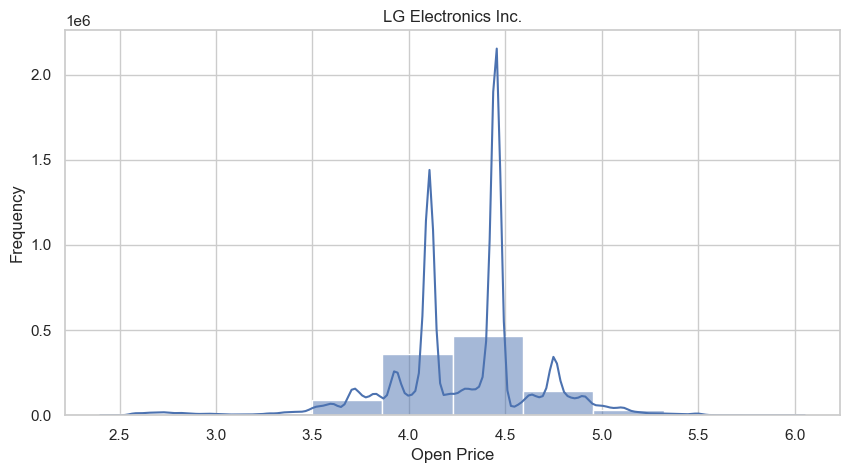

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(train_selected1['전용면적_log'], bins=10, kde=True)
plt.title('LG Electronics Inc.')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

In [67]:
import numpy as np

# 로그 변환한 컬럼 리스트
log_cols = [
    "층_log",
    "k-전체동수_log",
    "k-전체세대수_log",
    "k-연면적_log",
    "전용면적_log",
    "k-관리비부과면적_log",
    "주차대수_log",
    "건축면적_log"
]

# 0값 비율 확인
zero_check = {}
for col in log_cols:
    if col in train_selected1.columns:
        zero_ratio = (train_selected1[col] == 0).mean()
        zero_count = (train_selected1[col] == 0).sum()
        zero_check[col] = {"zero_count": zero_count, "zero_ratio": round(zero_ratio, 4)}

zero_report = pd.DataFrame(zero_check).T.sort_values("zero_ratio", ascending=False)
print("로그 변환 컬럼별 0값 현황")
display(zero_report)


로그 변환 컬럼별 0값 현황


,zero_count,zero_ratio
건축면적_log,118394.0,0.1050
주차대수_log,18141.0,0.0161
k-연면적_log,1082.0,0.0010
k-관리비부과면적_log,1082.0,0.0010
층_log,264.0,0.0002
k-전체동수_log,0.0,0.0000
k-전체세대수_log,0.0,0.0000
전용면적_log,0.0,0.0000


In [68]:
# 삭제 기준 컬럼
bad_cols = ["k-연면적_log", "k-관리비부과면적_log", '건축면적_log']

# 두 컬럼 중 하나라도 0인 행 제거
before = train_selected1.shape[0]
train_selected1 = train_selected1[~( (train_selected1[bad_cols] == 0).any(axis=1) )]
after = train_selected1.shape[0]

print(f"삭제된 행 개수: {before - after}")
print(f"남은 데이터 개수: {after}")


삭제된 행 개수: 119403
남은 데이터 개수: 1008691


In [69]:
train_selected1.columns

Index(['아파트명', '건축년도', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', '기타/의무/임대/임의=1/2/3/4', '사용허가여부',
       '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월', '소형비율', '중소형비율',
       '중대형비율', '대형비율', '층_log', 'k-전체동수_log', 'k-전체세대수_log', 'k-연면적_log',
       '전용면적_log', 'k-관리비부과면적_log', '주차대수_log', '건축면적_log', '구', '동'],
      dtype='object')

In [70]:
all = list(train_selected1['구'].unique())
gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)

In [71]:
is_gangnam = []
for x in train_selected1['구'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# 파생변수를 하나 만릅니다.
train_selected1['강남여부'] = is_gangnam

In [72]:
train_selected1['신축여부'] = train_selected1['건축년도'].apply(lambda x: 1 if x >= 2009 else 0)

In [73]:
train_selected1

,아파트명,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,기타/의무/임대/임의=1/2/3/4,사용허가여부,...,k-전체세대수_log,k-연면적_log,전용면적_log,k-관리비부과면적_log,주차대수_log,건축면적_log,구,동,강남여부,신축여부
0,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,임의,Y,...,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588,강남구,개포동,1,0
1,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,임의,Y,...,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588,강남구,개포동,1,0
2,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,임의,Y,...,5.602119,10.027385,4.024994,10.027385,5.572154,8.488588,강남구,개포동,1,0
3,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,임의,Y,...,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588,강남구,개포동,1,0
4,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21 00:00:00.0,임의,Y,...,5.602119,10.027385,4.394079,10.027385,5.572154,8.488588,강남구,개포동,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,의무,Y,...,7.246368,12.159332,4.450269,11.438299,7.358194,9.559023,중랑구,신내동,0,1
1128090,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,의무,Y,...,7.246368,12.159332,4.449919,11.438299,7.358194,9.559023,중랑구,신내동,0,1
1128091,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,의무,Y,...,7.246368,12.159332,4.631325,11.438299,7.358194,9.559023,중랑구,신내동,0,1
1128092,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18 00:00:00.0,의무,Y,...,7.246368,12.159332,4.453649,11.438299,7.358194,9.559023,중랑구,신내동,0,1


In [74]:
train_selected1['k-사용검사일-사용승인일']= pd.to_datetime(train_selected1['k-사용검사일-사용승인일'], errors='coerce')

In [75]:
train_selected1.columns

Index(['아파트명', '건축년도', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', '기타/의무/임대/임의=1/2/3/4', '사용허가여부',
       '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월', '소형비율', '중소형비율',
       '중대형비율', '대형비율', '층_log', 'k-전체동수_log', 'k-전체세대수_log', 'k-연면적_log',
       '전용면적_log', 'k-관리비부과면적_log', '주차대수_log', '건축면적_log', '구', '동', '강남여부',
       '신축여부'],
      dtype='object')

In [76]:
bus = pd.read_csv('bus_feature.csv', encoding='utf-8')
subway = pd.read_csv('subway_feature.csv', encoding='utf-8')
bus

,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
...,...,...,...,...,...,...
12579,124000334,25995,우성아파트,127.139338,37.550386,일반차로
12580,124000333,25996,우성아파트,127.140046,37.550643,일반차로
12581,124000332,25997,조일약국,127.123596,37.533630,일반차로
12582,124000331,25998,성내시장,127.125497,37.536155,일반차로


In [1]:
bus.columns = ['노드ID', '정류소번호', '정류소명', '경도', '위도', '정류소 타입' ]

NameError: name 'bus' is not defined

In [78]:
bus

,노드ID,정류소번호,정류소명,경도,위도,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
...,...,...,...,...,...,...
12579,124000334,25995,우성아파트,127.139338,37.550386,일반차로
12580,124000333,25996,우성아파트,127.140046,37.550643,일반차로
12581,124000332,25997,조일약국,127.123596,37.533630,일반차로
12582,124000331,25998,성내시장,127.125497,37.536155,일반차로


In [79]:
subway

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387
...,...,...,...,...,...
763,154,종로5가,1호선,37.570926,127.001849
764,153,종로3가,1호선,37.570406,126.991847
765,152,종각,1호선,37.570161,126.982923
766,151,시청,1호선,37.565715,126.977088


In [81]:
from sklearn.neighbors import BallTree


# 위도/경도를 라디안 단위로 변환 (BallTree는 라디안 필요)
train_coords = np.radians(train_selected1[['좌표Y', '좌표X']].values)
bus_coords = np.radians(bus[['위도', '경도']].values)

# BallTree 생성 (하버사인 거리 = 지구곡률 고려)
tree = BallTree(bus_coords, metric='haversine')

# 300m = 0.3km / 지구 반지름(6371km) → 라디안 환산
radius = 0.3 / 6371.0

# 각 집 좌표 기준으로 반경 내 버스 정류장 있는지 여부
indices = tree.query_radius(train_coords, r=radius)

train_selected1['bus_nearby'] = [1 if len(ind) > 0 else 0 for ind in indices]


In [82]:
train_selected1['bus_nearby'].value_counts()

1    966426
0     42265
Name: bus_nearby, dtype: int64

In [83]:
# ===== 파라미터 =====
BUS_LIMIT_M = 300          # 500~800m 중 네가 원하는 값으로 변경
EARTH_RADIUS_KM = 6371.0

# ===== 입력 =====
# train: 집 좌표가 들어있는 DF, 컬럼명 예시 ['위도','경도']
# subway: 지하철역 DF, 컬럼명 예시 ['역사명','위도','경도']
# 결측/비정상 좌표 제거 (선택)
train_ = train_selected1.dropna(subset=['좌표Y','좌표X']).copy()
bus_ = bus.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 =====
train_coords_rad  = np.radians(train_[['좌표Y','좌표X']].values)
bus_coords_rad = np.radians(bus_[['위도','경도']].values)

# ===== BallTree (하버사인) =====
tree = BallTree(bus_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (BUS_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = tree.query_radius(train_coords_rad, r=radius_rad)
train_['bus_nearby'] = [1 if len(idxs) > 0 else 0 for idxs in inside_indices]

# 가장 가까운 지하철역까지의 거리(미터) & 이름(옵션)
# BallTree.query 반환 거리 단위: 라디안 -> m 로 변환
dist_rad, ind = tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx = ind[:, 0]

train_['nearest_bus_dist_m'] = nearest_dist_m.round(1)
train_['nearest_bus_name'] = bus_.iloc[nearest_idx]['정류소명'].values


train_selected1[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']] = \
    train_.reindex(train.index)[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']]




In [84]:
# ===== 파라미터 =====
SUBWAY_LIMIT_M = 800         # 500~800m 중 네가 원하는 값으로 변경
EARTH_RADIUS_KM = 6371.0

# ===== 입력 =====
# train: 집 좌표가 들어있는 DF, 컬럼명 예시 ['위도','경도']
# subway: 지하철역 DF, 컬럼명 예시 ['역사명','위도','경도']
# 결측/비정상 좌표 제거 (선택)
train_ = train_selected1.dropna(subset=['좌표Y','좌표X']).copy()
subway_ = bus.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 =====
train_coords_rad  = np.radians(train_[['좌표Y','좌표X']].values)
subway_coords_rad = np.radians(bus_[['위도','경도']].values)

# ===== BallTree (하버사인) =====
subway_tree = BallTree(bus_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (SUBWAY_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = tree.query_radius(train_coords_rad, r=radius_rad)
train_['subway_nearby'] = [1 if len(idxs) > 0 else 0 for idxs in inside_indices]

# 가장 가까운 지하철역까지의 거리(미터) & 이름(옵션)
# BallTree.query 반환 거리 단위: 라디안 -> m 로 변환
dist_rad, ind = tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx = ind[:, 0]

train_['nearest_subway_dist_m'] = nearest_dist_m.round(1)
train_['nearest_subway_name'] = bus_.iloc[nearest_idx]['정류소명'].values


train_selected1[['subway_nearby','nearest_subway_dist_m','nearest_subway_name']] = \
    train_.reindex(train.index)[['subway_nearby','nearest_subway_dist_m','nearest_subway_name']]




In [85]:
train_selected1

,아파트명,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,기타/의무/임대/임의=1/2/3/4,사용허가여부,...,구,동,강남여부,신축여부,bus_nearby,nearest_bus_dist_m,nearest_bus_name,subway_nearby,nearest_subway_dist_m,nearest_subway_name
0,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
1,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
2,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
3,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
4,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128090,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128091,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128092,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞


In [86]:
train_selected1

,아파트명,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,기타/의무/임대/임의=1/2/3/4,사용허가여부,...,구,동,강남여부,신축여부,bus_nearby,nearest_bus_dist_m,nearest_bus_name,subway_nearby,nearest_subway_dist_m,nearest_subway_name
0,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
1,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
2,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
3,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
4,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,강남구,개포동,1,0,1.0,61.8,개포우성아파트,1.0,61.8,개포우성아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128090,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128091,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞
1128092,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,중랑구,신내동,0,1,1.0,59.5,우디안아파트114동앞,1.0,59.5,우디안아파트114동앞


In [87]:
train_selected1['아파트명'].value_counts().tail(100)

나래8차             2
동서3호             2
재훈               2
그랜드빌             2
위너스힐             2
                ..
한원힐트리움아레나        1
파크팰리스            1
브이티스타일           1
샤인파크             1
힐스테이트세운센트럴1단지    1
Name: 아파트명, Length: 100, dtype: int64

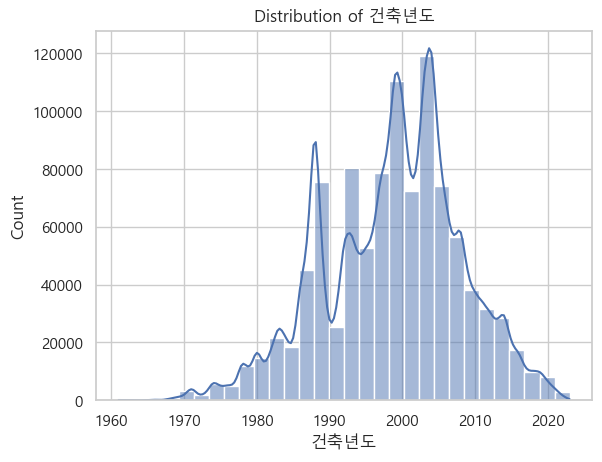

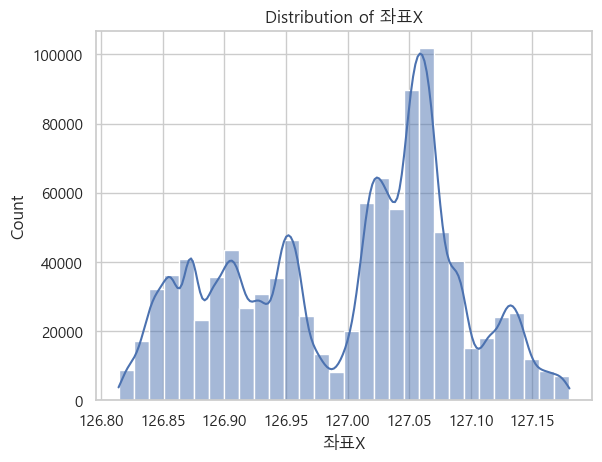

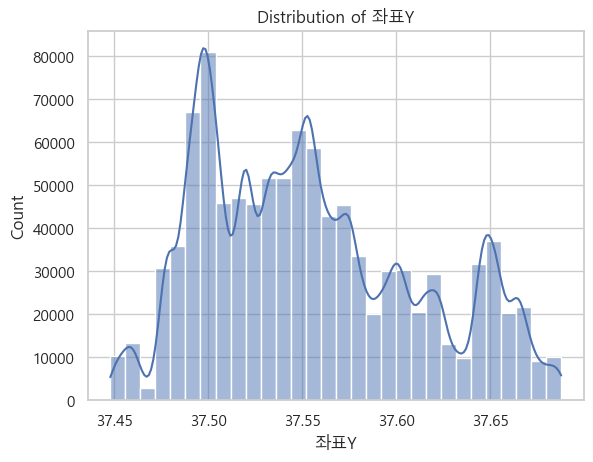

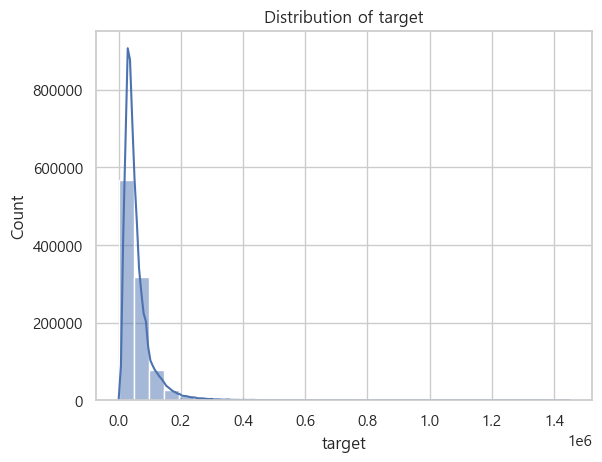

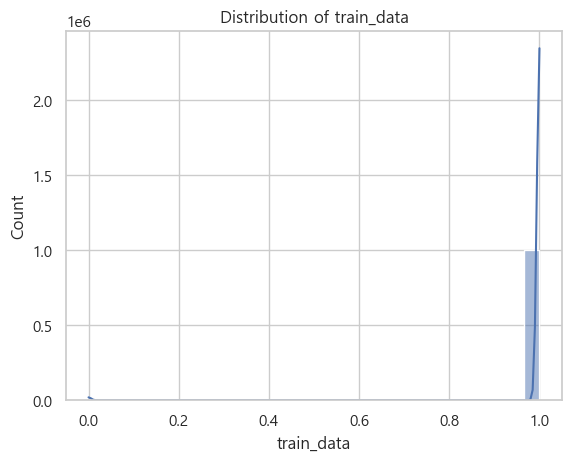

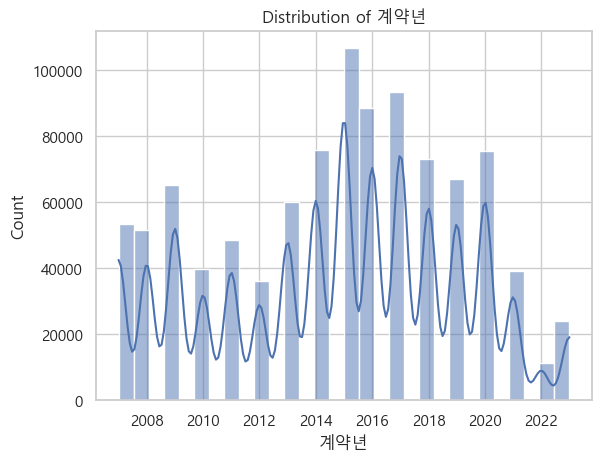

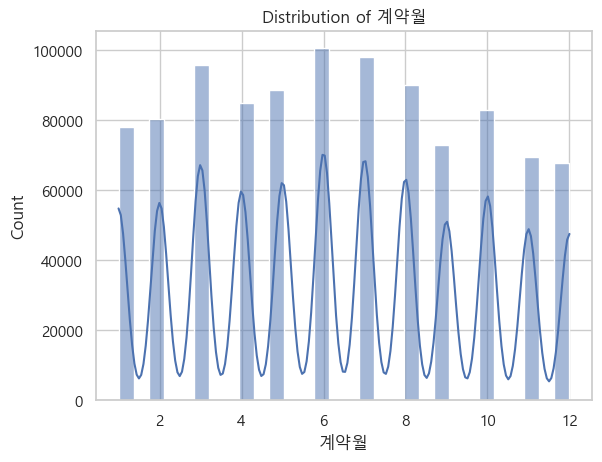

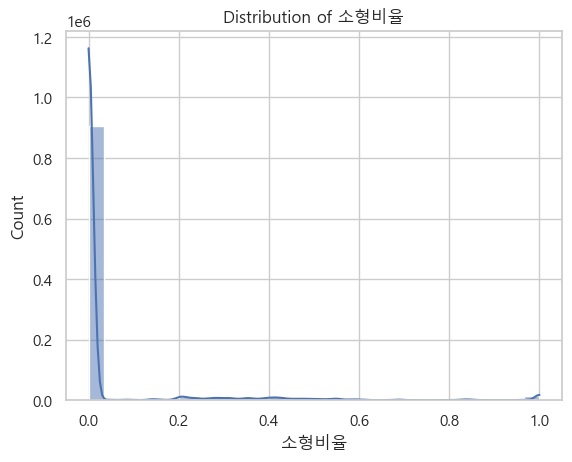

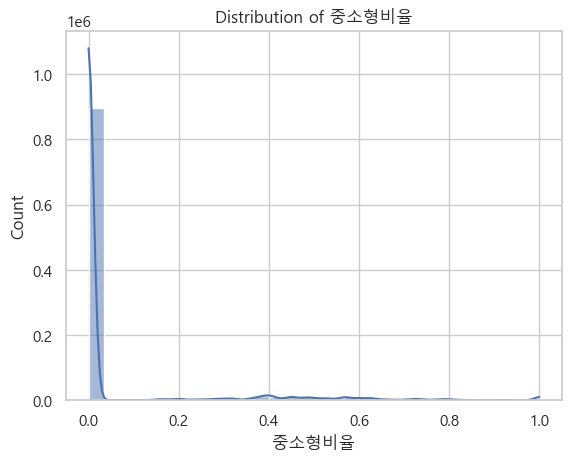

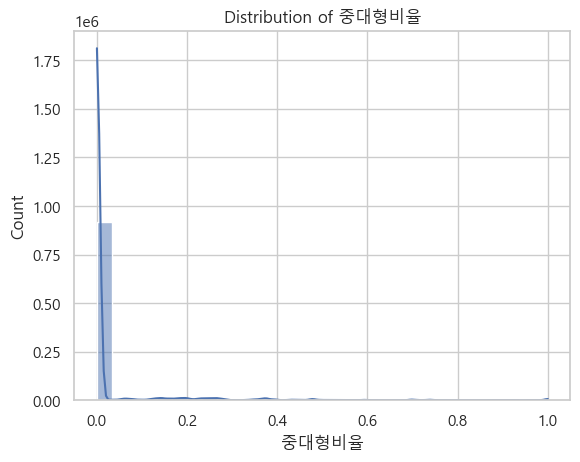

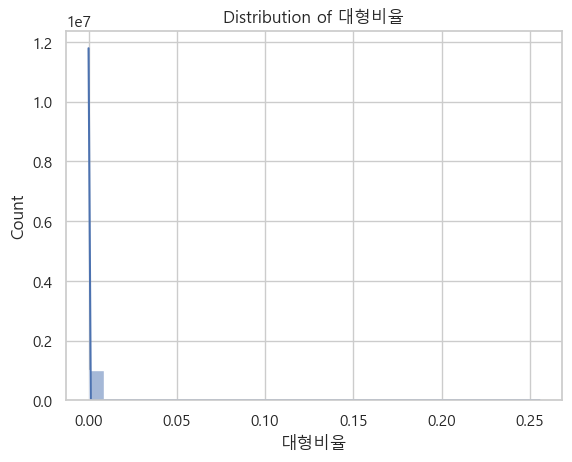

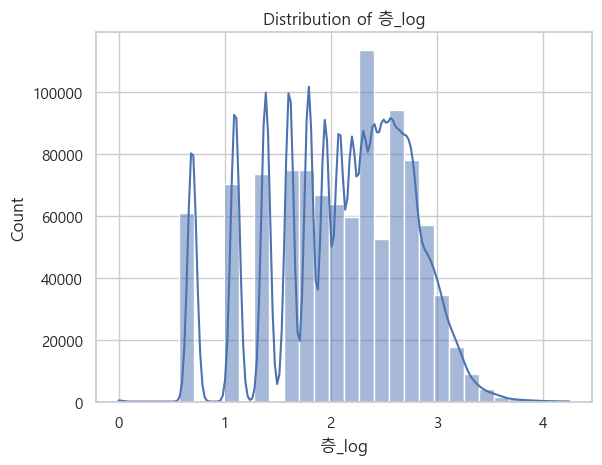

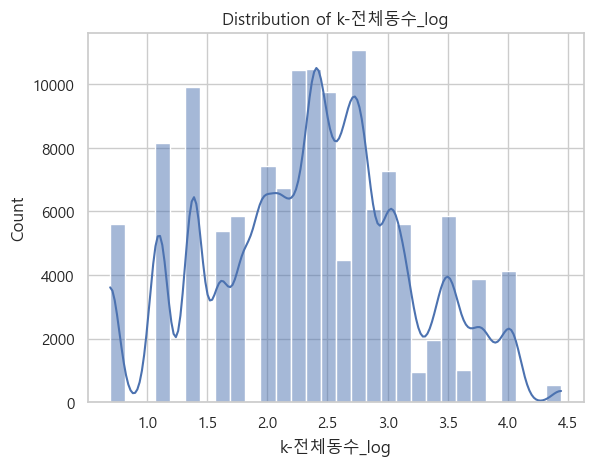

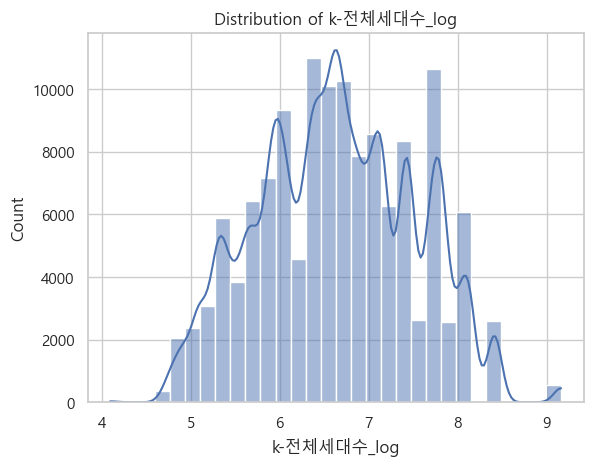

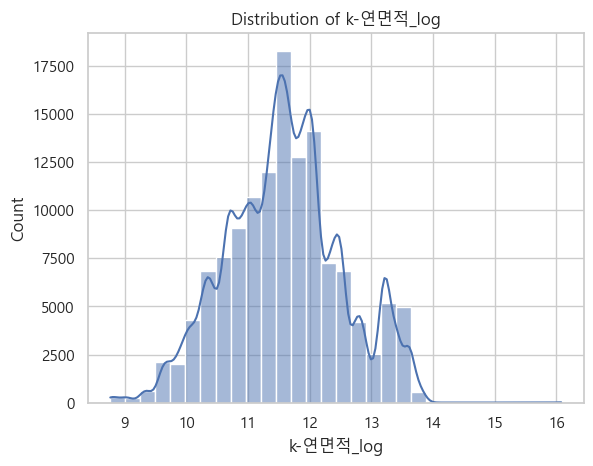

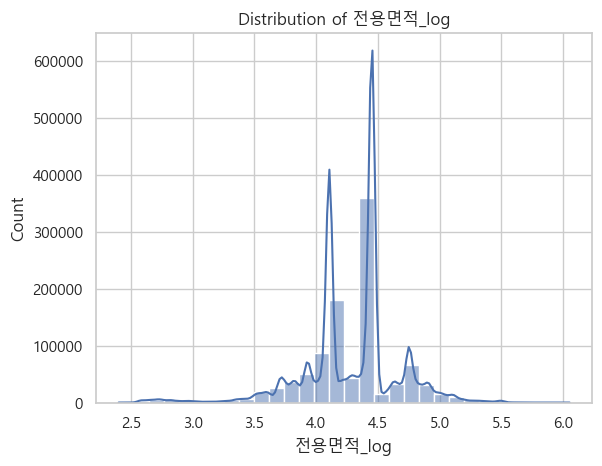

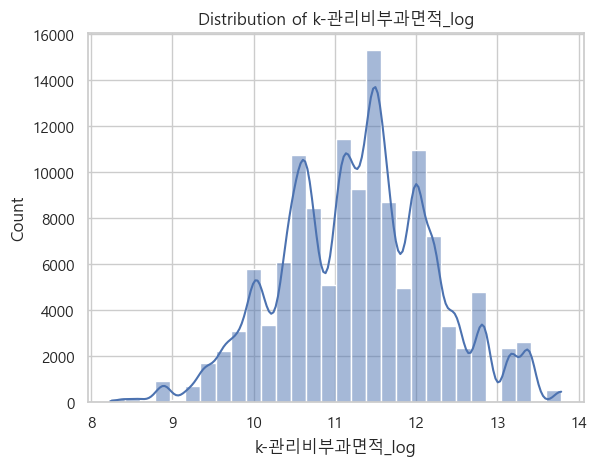

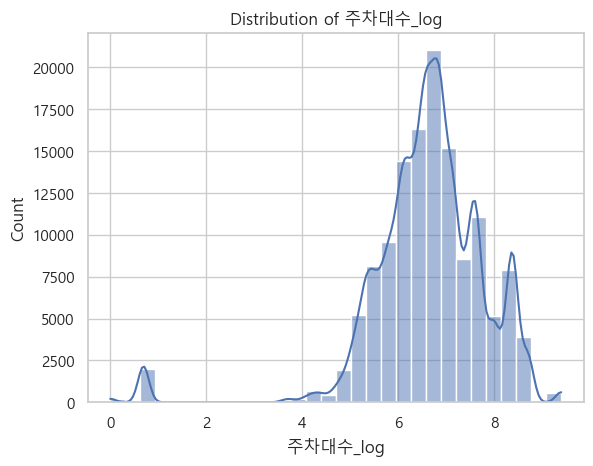

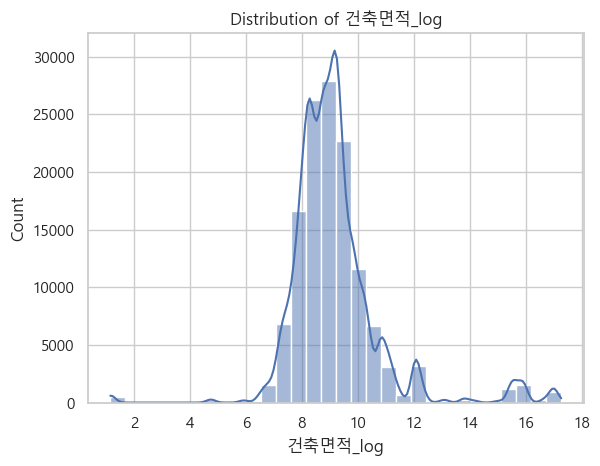

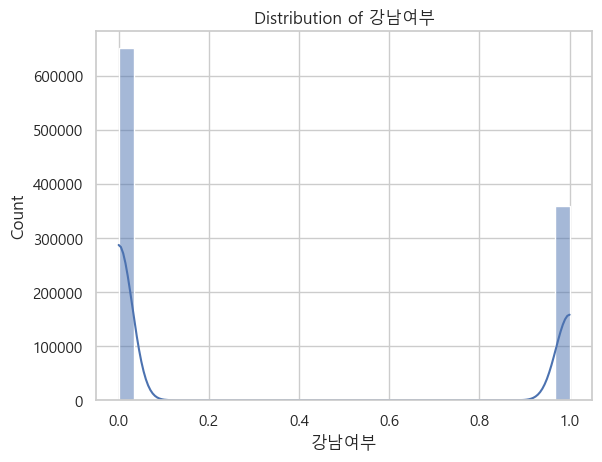

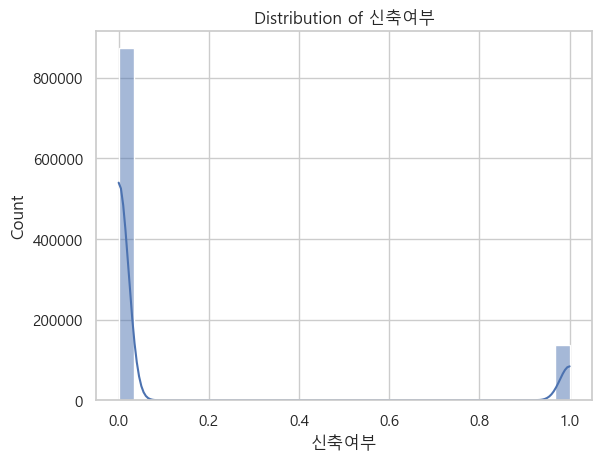

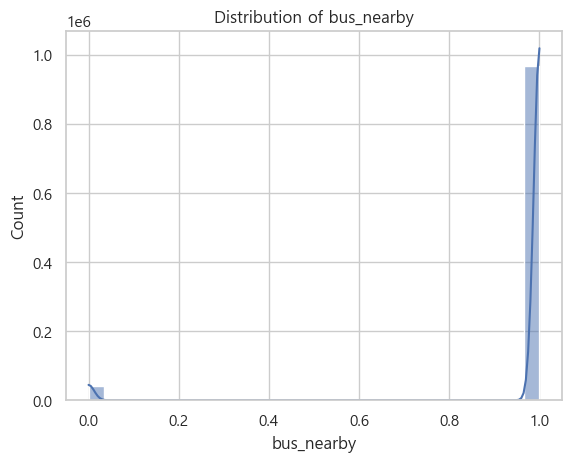

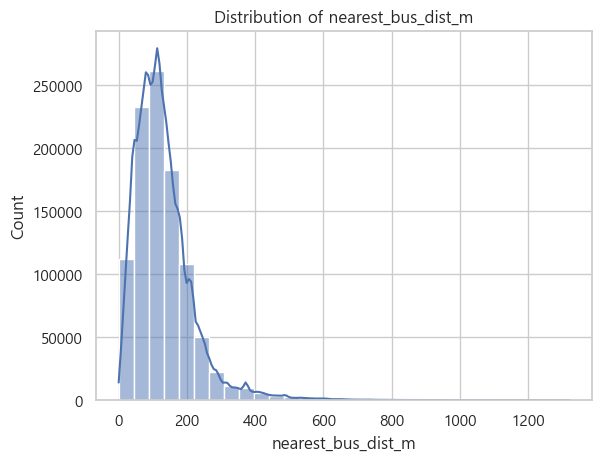

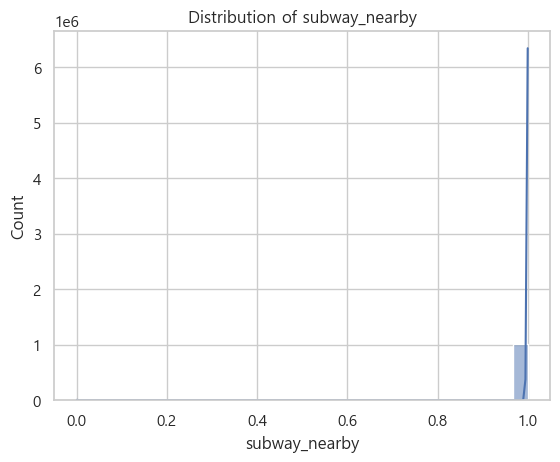

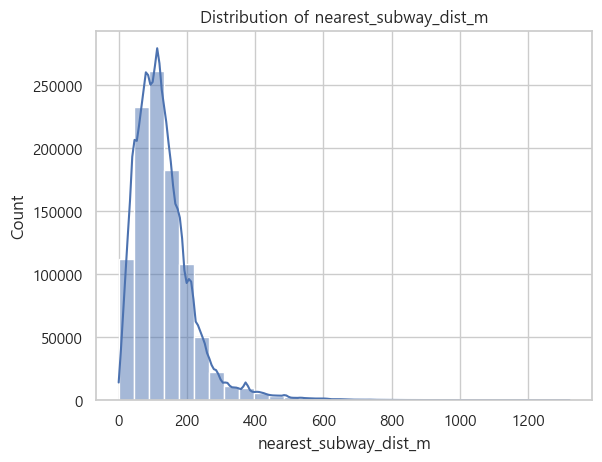

In [88]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
numeric_cols = train_selected1.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    sns.histplot(data=train_selected1, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [89]:
log_cols1 = ['nearest_bus_dist_m','nearest_subway_dist_m']

for col in log_cols1:
    if col in train_selected1.columns:
        # 음수/0 방지: 0보다 작은 값은 0으로 클리핑 후 log1p 적용
        train_selected1[col + "_log"] = np.log1p(train_selected1[col].clip(lower=0))

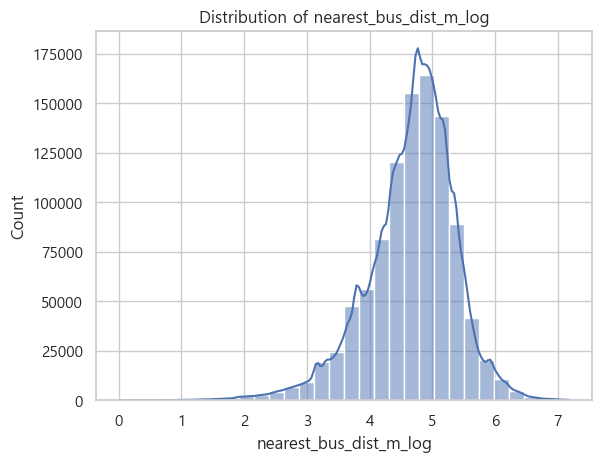

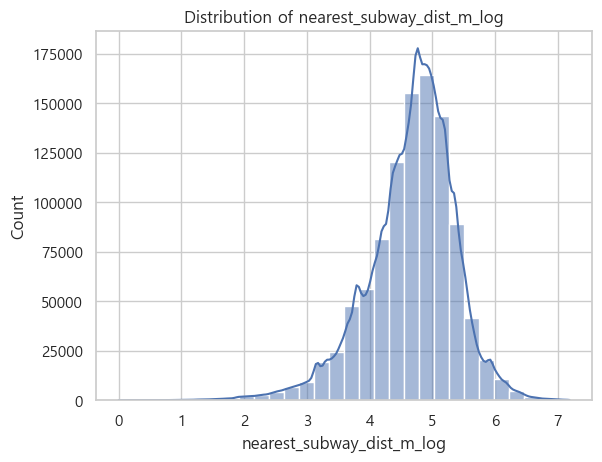

In [90]:
log_cols1 = ['nearest_bus_dist_m_log','nearest_subway_dist_m_log']

for col in log_cols1:
    sns.histplot(data=train_selected1, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [91]:
train_selected1.drop(['nearest_bus_dist_m','nearest_subway_dist_m'], axis=1, inplace=True)

NameError: name 'train_main' is not defined

In [93]:
train_selected1.drop(['좌표X','좌표Y','nearest_subway_name','nearest_bus_name'], axis=1, inplace=True)

In [94]:
train_selected1.drop('대형비율',axis=1, inplace=True)

In [95]:
train_selected1[['건축년도', '계약년', '계약월',
    '소형비율', '중소형비율', '중대형비율',
    '층_log', 'k-전체동수_log', 'k-전체세대수_log',
    'k-연면적_log', '전용면적_log', 'k-관리비부과면적_log',
    '주차대수_log', '건축면적_log',
    'nearest_subway_dist_m_log', 'nearest_bus_dist_m_log']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008691 entries, 0 to 1128093
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   건축년도                       1008691 non-null  int64  
 1   계약년                        1008691 non-null  int64  
 2   계약월                        1008691 non-null  int64  
 3   소형비율                       1008691 non-null  float64
 4   중소형비율                      1008691 non-null  float64
 5   중대형비율                      1008691 non-null  float64
 6   층_log                      1008691 non-null  float64
 7   k-전체동수_log                 132566 non-null   float64
 8   k-전체세대수_log                132566 non-null   float64
 9   k-연면적_log                  132566 non-null   float64
 10  전용면적_log                   1008691 non-null  float64
 11  k-관리비부과면적_log              132566 non-null   float64
 12  주차대수_log                   132414 non-null   float64
 13  건축면적_log    

In [96]:

# ✅ 표준화할 수치형 컬럼 리스트
scale_cols = [
    '건축년도', '계약년', '계약월',
    '소형비율', '중소형비율', '중대형비율',
    '층_log', 'k-전체동수_log', 'k-전체세대수_log',
    'k-연면적_log', '전용면적_log', 'k-관리비부과면적_log',
    '주차대수_log', '건축면적_log',
    'nearest_subway_dist_m_log', 'nearest_bus_dist_m_log'
]

# ✅ StandardScaler 객체 생성
scaler = StandardScaler()

# ✅ 표준화 적용 (numpy array → DataFrame 변환)
scaled_values = scaler.fit_transform(train_selected1[scale_cols])

scaled_df = pd.DataFrame(scaled_values, columns=[col + "_std" for col in scale_cols], index=train_selected1.index)

# ✅ 원본 train에 병합
train_std = pd.concat([train_selected1, scaled_df], axis=1)

print(train_std.head())


     아파트명  건축년도 k-단지분류(아파트,주상복합등등) k-세대타입(분양형태) k-관리방식 k-복도유형 k-난방방식  \
0  개포6차우성  1987                아파트           분양   자치관리    계단식   개별난방   
1  개포6차우성  1987                아파트           분양   자치관리    계단식   개별난방   
2  개포6차우성  1987                아파트           분양   자치관리    계단식   개별난방   
3  개포6차우성  1987                아파트           분양   자치관리    계단식   개별난방   
4  개포6차우성  1987                아파트           분양   자치관리    계단식   개별난방   

  k-사용검사일-사용승인일 기타/의무/임대/임의=1/2/3/4 사용허가여부  ...  층_log_std  k-전체동수_log_std  \
0    1987-11-21                  임의      Y  ...  -1.060724        -0.20903   
1    1987-11-21                  임의      Y  ...  -0.723247        -0.20903   
2    1987-11-21                  임의      Y  ...  -0.447508        -0.20903   
3    1987-11-21                  임의      Y  ...  -0.723247        -0.20903   
4    1987-11-21                  임의      Y  ...  -1.495808        -0.20903   

   k-전체세대수_log_std  k-연면적_log_std  전용면적_log_std  k-관리비부과면적_log_std  \
0        -1.183235       -1.

In [97]:
train_selected1.loc[train_selected1['train_data']== 0]

,아파트명,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,기타/의무/임대/임의=1/2/3/4,사용허가여부,...,주차대수_log,건축면적_log,구,동,강남여부,신축여부,bus_nearby,subway_nearby,nearest_bus_dist_m_log,nearest_subway_dist_m_log
1118822,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
1118823,개포더샵트리에,2021,아파트,분양,위탁관리,계단식,지역난방,2021-12-01,의무,Y,...,5.723585,7.910393,강남구,개포동,1,1,1.0,1.0,4.844187,4.844187
1118824,개포우성3차,1984,아파트,분양,자치관리,혼합식,지역난방,1984-12-31,의무,Y,...,6.040255,11.019698,강남구,개포동,1,0,1.0,1.0,4.598146,4.598146
1118825,개포우성3차,1984,아파트,분양,자치관리,혼합식,지역난방,1984-12-31,의무,Y,...,6.040255,11.019698,강남구,개포동,1,0,1.0,1.0,4.598146,4.598146
1118826,개포우성3차,1984,아파트,분양,자치관리,혼합식,지역난방,1984-12-31,의무,Y,...,6.040255,11.019698,강남구,개포동,1,0,1.0,1.0,4.598146,4.598146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128090,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128091,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128092,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643


In [98]:
print(train_selected1['train_data'].value_counts())

1    1000429
0       8262
Name: train_data, dtype: int64


In [99]:
train_selected1

,아파트명,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-사용검사일-사용승인일,기타/의무/임대/임의=1/2/3/4,사용허가여부,...,주차대수_log,건축면적_log,구,동,강남여부,신축여부,bus_nearby,subway_nearby,nearest_bus_dist_m_log,nearest_subway_dist_m_log
0,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
1,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
2,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
3,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
4,개포6차우성,1987,아파트,분양,자치관리,계단식,개별난방,1987-11-21,임의,Y,...,5.572154,8.488588,강남구,개포동,1,0,1.0,1.0,4.139955,4.139955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128090,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128091,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643
1128092,신내우디안1단지,2014,아파트,기타,위탁관리,혼합식,개별난방,2014-06-18,의무,Y,...,7.358194,9.559023,중랑구,신내동,0,1,1.0,1.0,4.102643,4.102643


In [101]:
train_selected1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008691 entries, 0 to 1128093
Data columns (total 33 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   아파트명                       1008691 non-null  object        
 1   건축년도                       1008691 non-null  int64         
 2   k-단지분류(아파트,주상복합등등)         1008691 non-null  object        
 3   k-세대타입(분양형태)               1008691 non-null  object        
 4   k-관리방식                     1008691 non-null  object        
 5   k-복도유형                     1008691 non-null  object        
 6   k-난방방식                     1008691 non-null  object        
 7   k-사용검사일-사용승인일              132566 non-null   datetime64[ns]
 8   기타/의무/임대/임의=1/2/3/4        1008691 non-null  object        
 9   사용허가여부                     1008691 non-null  object        
 10  target                     1008691 non-null  float64       
 11  train_data                 1008691 no